# Time Series Modeling: Spain Energy Data

## Prepare Notebook

**Read in libraries**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings

**Set Notebook Preferences**

In [29]:
#Set Pandas preferenes
pd.options.display.max_rows = 100

#Set style for matplotlib and fontdict for plots
plt.style.use('seaborn-dark')
title_dict= {'fontsize':18,
            'style': 'italic',
            'fontweight': 'semibold'}

label_dict= {'fontsize':14,
             'fontweight': 'semibold'}

#Surpress annoying warnings
warnings.filterwarnings('ignore')

**Read in data**

In [30]:
#Set path to data
path = r'\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Data\03_Processed_Data'

#Read in training and test data
X_train = pd.read_csv(path + '/2020_0624_Training_Data.csv', index_col=0)
X_test = pd.read_csv(path + '/2020_0624_Test_Data.csv', index_col=0)

#Read in price forecasts data
price_forecasts = pd.read_csv(path + '/2020_0620_Data_Price_Forecasts.csv', index_col=0)

**Preview Data**

In [31]:
print('Training data shape:', X_train.shape)
display(X_train.head())

print('\nTest data shape:',X_test.shape)
display(X_test.head())

print('\nPrice forecasts shape:',price_forecasts.shape)
display(price_forecasts.head())

Training data shape: (29789, 8)


,generation fossil gas,generation fossil hard coal,generation hydro pumped storage consumption,price actual,total load actual,price_actual_season,price_actual_trend,price_actual_stationary
date_time,,,,,,,,
2015-01-01 12:00:00,3784.0,4220.0,972.0,60.12,24133.0,3.750959,62.119792,-5.750750
2015-01-01 13:00:00,3754.0,4404.0,922.0,62.05,24713.0,3.292118,61.956250,-3.198368
2015-01-01 14:00:00,3779.0,4256.0,941.0,62.06,24672.0,2.675646,61.617917,-2.233563
2015-01-01 15:00:00,3708.0,4038.0,1069.0,59.76,23528.0,1.874951,61.322292,-3.437243
2015-01-01 16:00:00,3813.0,4191.0,970.0,61.18,23118.0,1.011884,61.168542,-1.000426



Test data shape: (5257, 8)


,generation fossil gas,generation fossil hard coal,generation hydro pumped storage consumption,price actual,total load actual,price_actual_season,price_actual_trend,price_actual_stationary
date_time,,,,,,,,
2018-05-26 14:00:00,6048.0,4527.0,194.0,66.61,27714.0,0.535144,66.952500,-0.877644
2018-05-26 15:00:00,5663.0,4094.0,194.0,60.59,26342.0,0.799412,67.053542,-7.262954
2018-05-26 16:00:00,5466.0,3676.0,463.0,56.99,25461.0,2.340335,67.139792,-12.490127
2018-05-26 17:00:00,5289.0,3610.0,492.0,56.71,25063.0,4.743248,67.174792,-15.208039
2018-05-26 18:00:00,5351.0,3880.0,280.0,59.06,24944.0,5.793649,67.189792,-13.923441



Price forecasts shape: (35070, 1)


,price_forecast
date_time,
2015-01-01 00:00:00,50.10
2015-01-01 01:00:00,48.10
2015-01-01 02:00:00,47.33
2015-01-01 03:00:00,42.27
2015-01-01 04:00:00,38.41


# Modeling

### Evaluate original price forecast performance

**Prepare price_forecasts data**

In [32]:
cutoff = round(len(price_forecasts) *.85)


#Split forecasts to evaluate predictions on train/test data
price_train = price_forecasts.price_forecast[:cutoff]
price_test = price_forecasts[cutoff:]

#Check label shapes
print('Train label shape{} Test label shape: {}'.format(price_train.shape,price_test.shape))

Train label shape(29810,) Test label shape: (5260, 1)


**Evaluate fit and performance**

Original Price Model Performance Metrics
MAE:11.568358444037331
MAPE:0.16530011046046492
MSE:229.38034309036792
RMSE:15.145307626138464


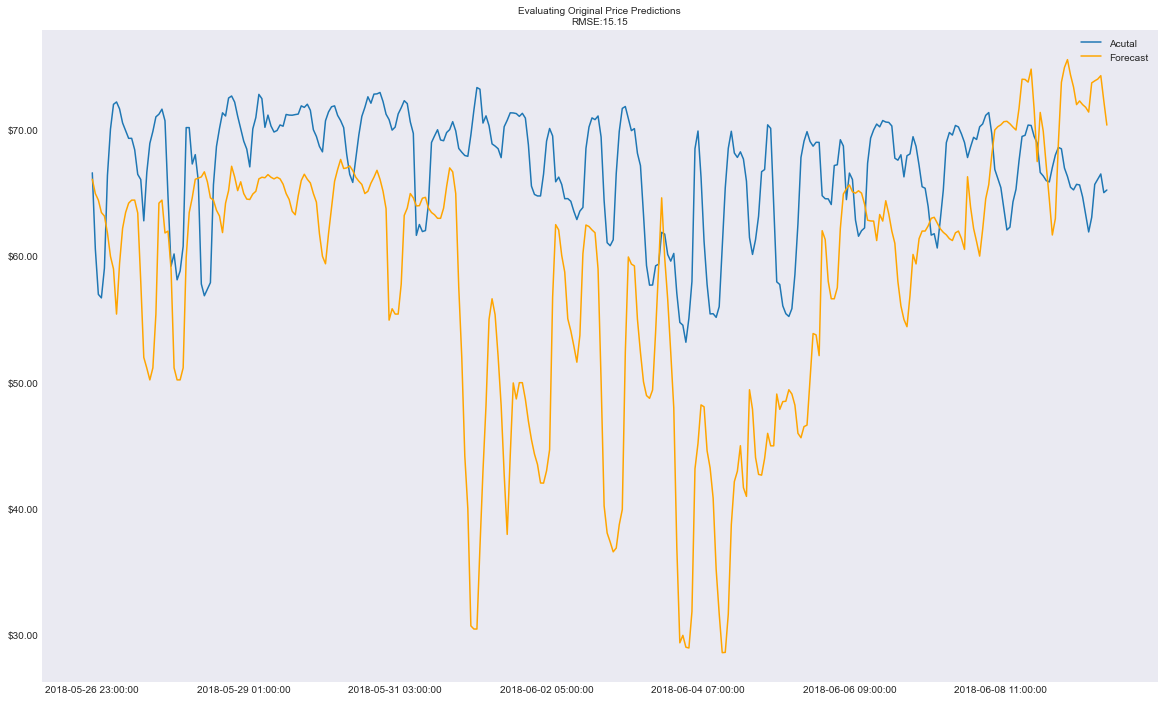

In [33]:
#Read in model_performance to capture metrics and timeseries_plot to plot timeseries
from TimeSeriesStats import model_performance
from TimeseriesPlotter import timeseries_plot

#Capture predictions
predictions = price_test.values
actual = X_test['price actual'].values

#Evaluate price preditions
metrics = model_performance(predictions, actual, 'Original Price Model')

#Create fig
f, ax = plt.subplots(figsize = (20,12))

#Plot original data
timeseries_plot(X_test['price actual'][:24*14], ax = ax)
timeseries_plot(price_test[:24*14],title='Evaluating Original Price Predictions\nRMSE:{}'.format(round(metrics['RMSE'],2)), color = 'orange', ax = ax)

###Set plot aesthetics###
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}.00".format(int(x))));
ax.legend(['Acutal', 'Forecast'], shadow = True);

## Univariate Analysis

In [34]:
#Set actual as target
actual = X_test['price actual']


### Base Model - Persistence Model Forecast

**Build Persistence Model Forecasts**

In [35]:
#Create list of historical values from price actual
history = [value for value in actual.values]

#Init empty list to store predictions
predictions = []

#Predictions are the previous actual record
for i in range(len(actual)):
    predictions.append(history[-1])
    history.append(actual[i])

#Store predictions in a data frame for later plotting
persistence_model_predictions = pd.DataFrame(predictions,index=actual.index)
persistence_model_predictions.columns = ['predictions']

#Check
display(persistence_model_predictions.head())

,predictions
date_time,
2018-05-26 14:00:00,71.81
2018-05-26 15:00:00,66.61
2018-05-26 16:00:00,60.59
2018-05-26 17:00:00,56.99
2018-05-26 18:00:00,56.71


**Evaluate Persistence Model**

Persistence Model Performance Metrics
MAE:1.9754612897089594
MAPE:0.029253484775499855
MSE:8.30429275252045
RMSE:2.8817169799479703


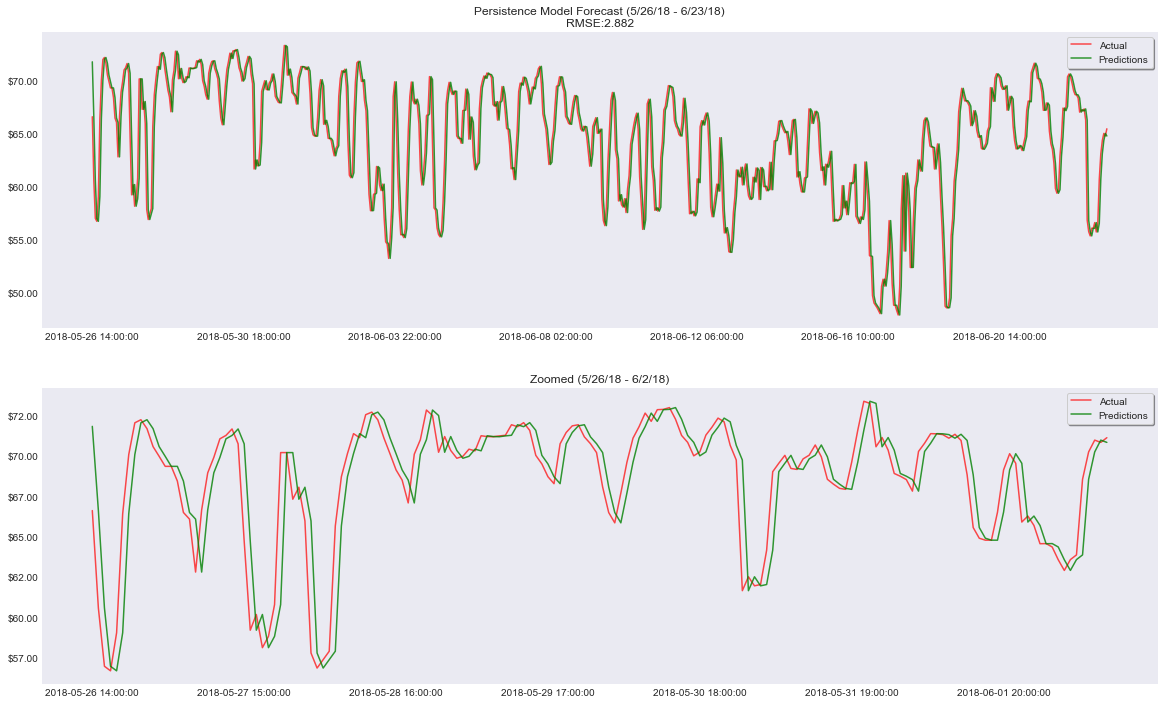

In [36]:
#Evaluate base model and store as metrics
metrics = model_performance(predictions,actual,'Persistence Model')

#Create fig
f, ax = plt.subplots(2,1,figsize = (20,12))

#Plot data 2 week zoom
timeseries_plot(actual[:24*28], ax=ax[0],color = 'red', alpha=.7)
timeseries_plot(persistence_model_predictions[:24*28], ax=ax[0], color = 'green',alpha=.8)

#Plot data 1 week zoom
timeseries_plot(actual[:24*7], ax=ax[1], color = 'red', alpha=.7)
timeseries_plot(persistence_model_predictions[:24*7], ax=ax[1], color = 'green', alpha=.8)

###Set plot aesthetics###
ax[0].set_title('Persistence Model Forecast (5/26/18 - 6/23/18)\nRMSE:{}'.format(round(metrics['RMSE'],3)))
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}.00".format(int(x))))
ax[0].legend(['Actual','Predictions'], frameon = True, shadow = True)

ax[1].set_title('Zoomed (5/26/18 - 6/2/18)')
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}.00".format(int(x))))
ax[1].legend(['Actual','Predictions'], frameon = True, shadow = True);

### Holt-Winters Exponential Smoothing

**Build HW Model**

In [37]:
#Import holt winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import HoltWintersResults

#Init model
holt_winters = ExponentialSmoothing(X_train['price_actual_stationary'].values,seasonal='add', seasonal_periods=12).fit(smoothing_level=0.8, smoothing_slope=0.2)

#Make predictions
holt_preds = holt_winters.forecast(len(actual))

**Convert predictions back to proper scale**

In [38]:
#Store predictions and test values in a dataframe
evaluate_hw = pd.DataFrame(holt_preds, index=actual.index)
evaluate_hw.columns = ['hw_preds']
evaluate_hw['actual'] = actual.values

#Add seasonal and trend components to hw_preds
evaluate_hw['adjusted_preds'] = evaluate_hw['hw_preds'] + X_test['price_actual_season'] + X_test['price_actual_trend']

#Check
display(evaluate_hw)

,hw_preds,actual,adjusted_preds
date_time,,,
2018-05-26 14:00:00,0.654029,66.61,68.141673
2018-05-26 15:00:00,-1.049062,60.59,66.803892
2018-05-26 16:00:00,-4.007850,56.99,65.472277
2018-05-26 17:00:00,-7.100664,56.71,64.817375
2018-05-26 18:00:00,-9.101818,59.06,63.881622
...,...,...,...
2018-12-31 07:00:00,-3.108427,60.70,68.332649
2018-12-31 08:00:00,-1.765656,66.64,69.214366
2018-12-31 09:00:00,0.213476,70.33,70.465094


**Evaluate Holt Winter's Predictions**

HW Performance Metrics
MAE:4.945704618595356
MAPE:0.07101842138388184
MSE:36.79915671838181
RMSE:6.066230849413976


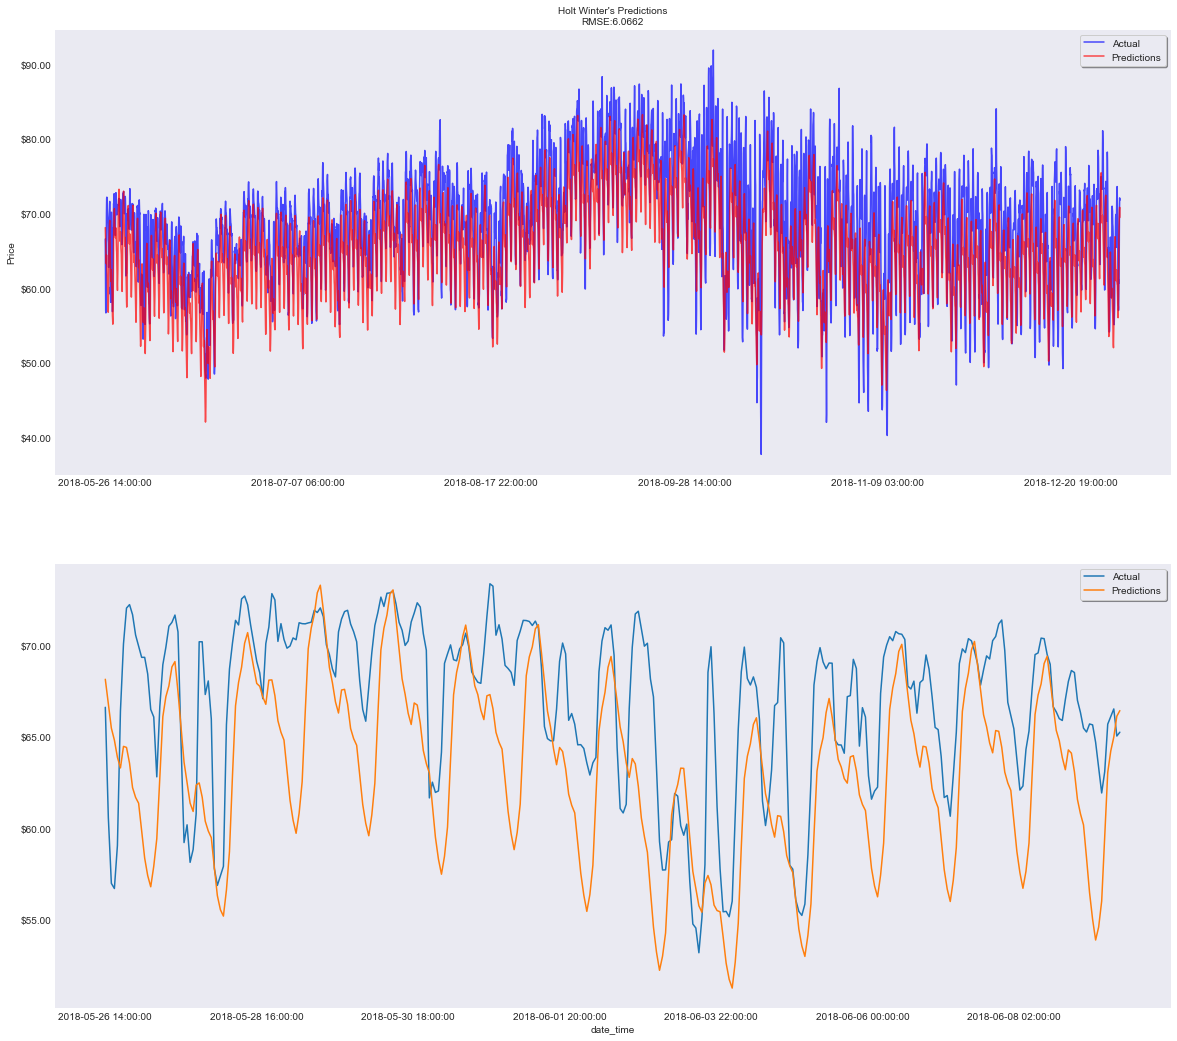

In [39]:
#Evaluate metrics
hw_metrics = model_performance(evaluate_hw.adjusted_preds.values, evaluate_hw.actual.values, 'HW')

#Create fig to plot data to evaluate fit
f,ax = plt.subplots(2,1,figsize = (20,18))

#Plot predictions against test data
timeseries_plot(evaluate_hw.actual, ax=ax[0], color = 'blue',alpha=.7)
timeseries_plot(evaluate_hw.adjusted_preds, ax=ax[0], 
                title ='Holt Winter\'s Predictions\nRMSE:{}'.format(round(hw_metrics['RMSE'],4)),
                title_dict=title_dict,ylabel='Price', color = 'red',label_dict=label_dict,alpha=.7)

###Set plot aesthetics**
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}.00".format(int(x))))
ax[0].legend(['Actual','Predictions'], frameon = True, shadow = True)

#Plot predictions against test data(zoomed)
evaluate_hw.actual[:24*14].plot( ax=ax[1])
evaluate_hw.adjusted_preds[:24*14].plot( ax=ax[1])


ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}.00".format(int(x))))
ax[1].legend(['Actual','Predictions'], frameon = True, shadow = True)

### ARMA Model 

**PACF and ACF of Stationary Target**

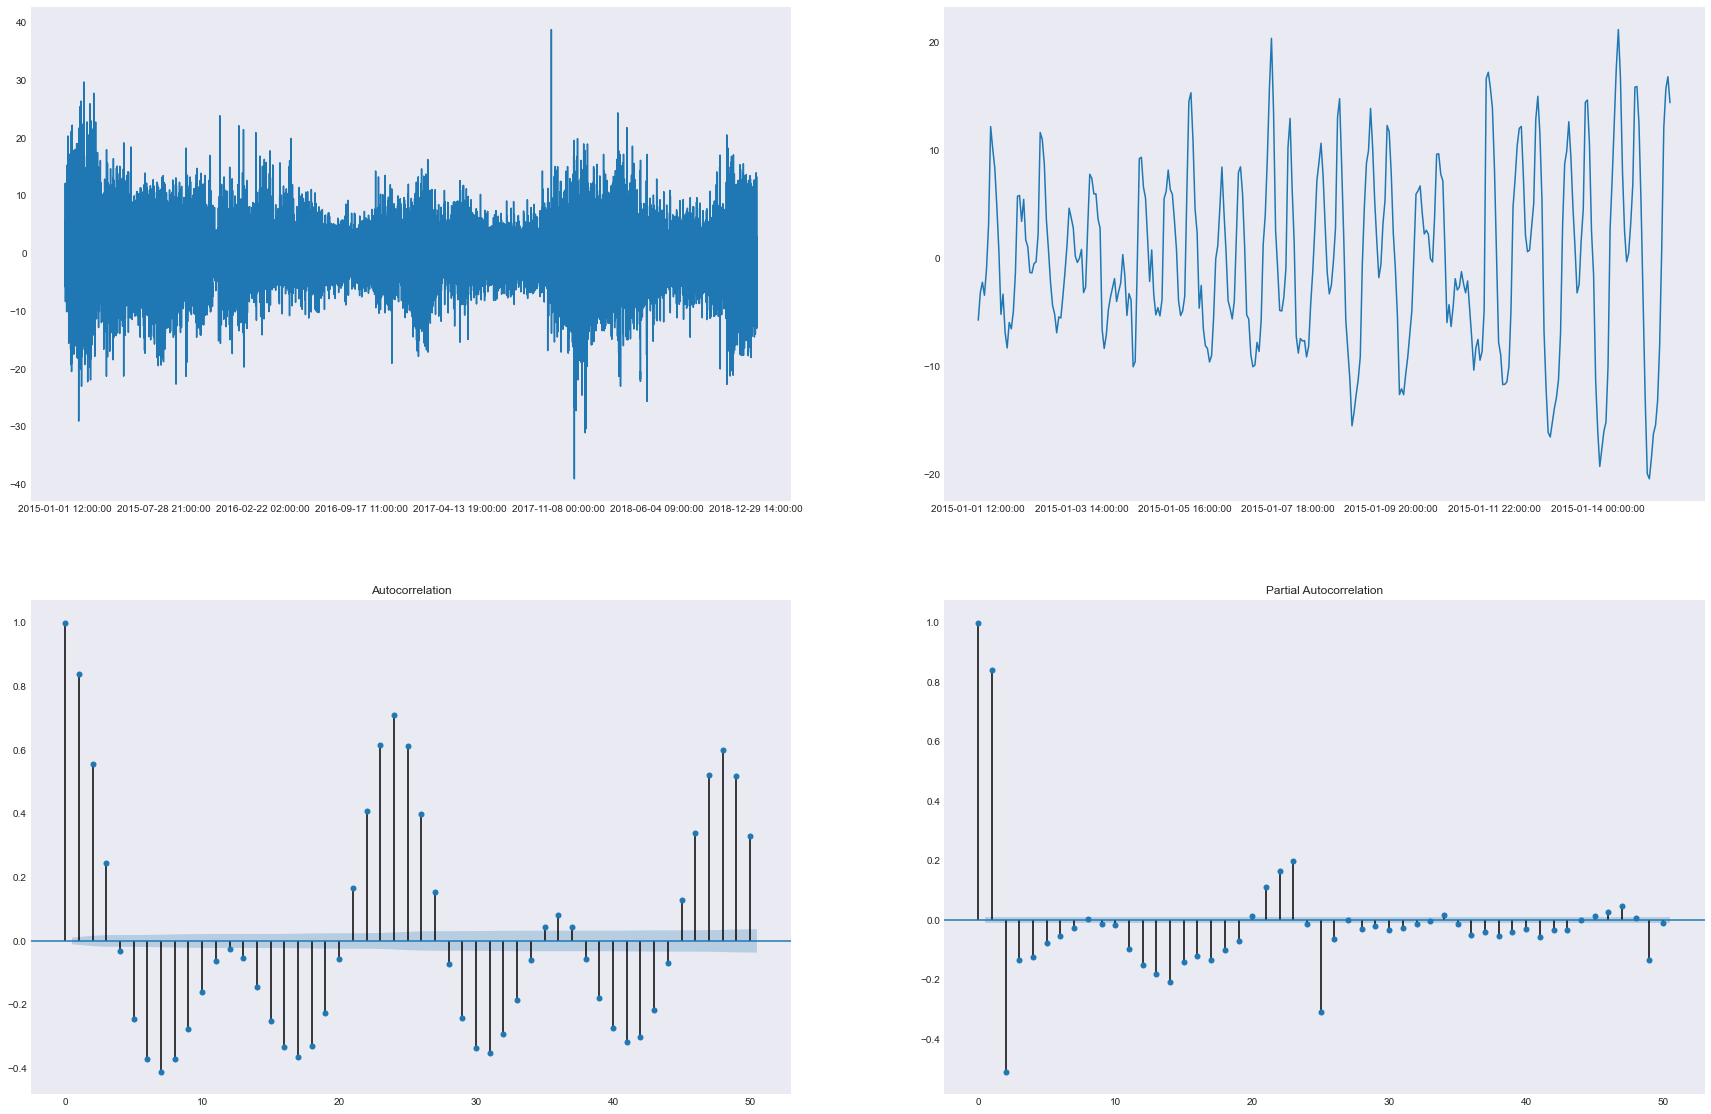

In [44]:
#Set path
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\02_Data_Processing'

#Read in image
Image(filename= path + '/stationary_target_PACF_ACF.png', height=1300, width=1500)

**Build ARMA Model**

In [45]:
#Import library
from statsmodels.tsa.arima_model import ARIMA

#Build, fit, and view ARMA summary
model = ARIMA(X_train['price_actual_stationary'].values, order=(2,0,1))
model_fitted = model.fit()
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                29789
Model:                     ARMA(2, 1)   Log Likelihood              -71550.292
Method:                       css-mle   S.D. of innovations              2.672
Date:                Fri, 26 Jun 2020   AIC                         143110.585
Time:                        13:14:52   BIC                         143152.094
Sample:                             0   HQIC                        143123.908
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.046      0.018      0.986      -0.090       0.092
ar.L1.y        1.5549      0.008    184.471      0.000       1.538       1.571
ar.L2.y       -0.7434      0.007   -109.286      0.000      -0.757      -0.730
ma.L1.y       -0.4345      0.013    -34.227      0.000      -0.459      -0.410
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0459           -0.5014j            1.1599           -0.0711
AR.2            1.0459           +0.5014j            1.1599            0.0711
MA.1            2.3013           +0.0000j            2.3013            0.0000
-----------------------------------------------------------------------------
"""

**Make and convert ARMA forecasts to proper scale**

In [62]:
#Create forecast
fc,se,conf = model_fitted.forecast(len(actual))

#Create arma_forecasts df to contain forecasts, upper/lower confidence intervals
arma_forecasts = pd.DataFrame(fc, index=actual.index)
arma_forecasts.columns = ['forecasts']
arma_forecasts['upper_conf']= conf[:,1] #add upper and lower confidence intervals to predictions
arma_forecasts['lower_conf'] =  conf[:,0]

#For loop converts columns in arma_forecasts to proper scale
for col in arma_forecasts.columns:
    arma_forecasts[col + '_adjusted'] = arma_forecasts[col] + X_test['price_actual_season'] + X_test['price_actual_trend']

#Add target to arma_forecasts and sort columns
arma_forecasts['actual']=actual
arma_forecasts = arma_forecasts.reindex(sorted(arma_forecasts.columns), axis=1)

#Check
display(arma_forecasts.head())

,actual,forecasts,forecasts_adjusted,lower_conf,lower_conf_adjusted,upper_conf,upper_conf_adjusted
date_time,,,,,,,
2018-05-26 14:00:00,66.61,1.305928,68.793572,-3.931651,63.555993,6.543506,74.031150
2018-05-26 15:00:00,60.59,1.058526,68.911480,-6.806994,61.045960,8.924047,76.777001
2018-05-26 16:00:00,56.99,0.675310,70.155437,-8.770823,60.709304,10.121444,79.601571
2018-05-26 17:00:00,56.71,0.263348,72.181388,-9.907928,62.010112,10.434624,82.352664
2018-05-26 18:00:00,59.06,-0.092352,72.891088,-10.453821,62.529620,10.269116,83.252557


**Evaluate ARMA Forecasts**

ARIMA Performance Metrics
MAE:4.325886697302129
MAPE:0.06587730820723477
MSE:31.857276805700337
RMSE:5.644225084606419


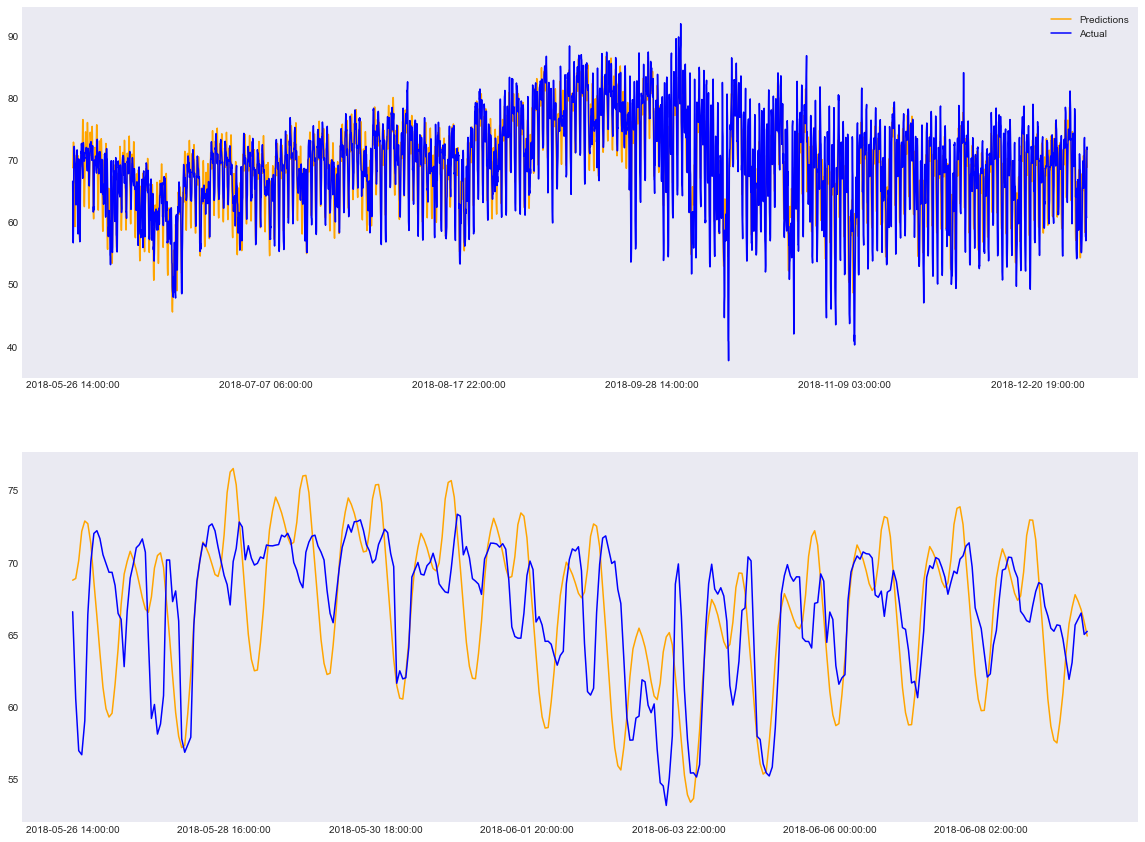

In [74]:
#Evaluate ARIMA's Performance
arima_metrics = model_performance(arma_forecasts.forecasts_adjusted.values,actual,'ARIMA')

#Set Figure
f, ax = plt.subplots(2,1,figsize = (20,15))

#Plot Forecasts
timeseries_plot(arma_forecasts['forecasts_adjusted'], ax = ax[0], color = 'orange')
timeseries_plot(actual, ax = ax[0], color = 'blue')
ax[0].legend(['Predictions','Actual'])


timeseries_plot(arma_forecasts['forecasts_adjusted'][:24*14], ax = ax[1],color = 'orange')
timeseries_plot(actual[:24*14], ax = ax[1],color = 'blue')

**Check Residuals**

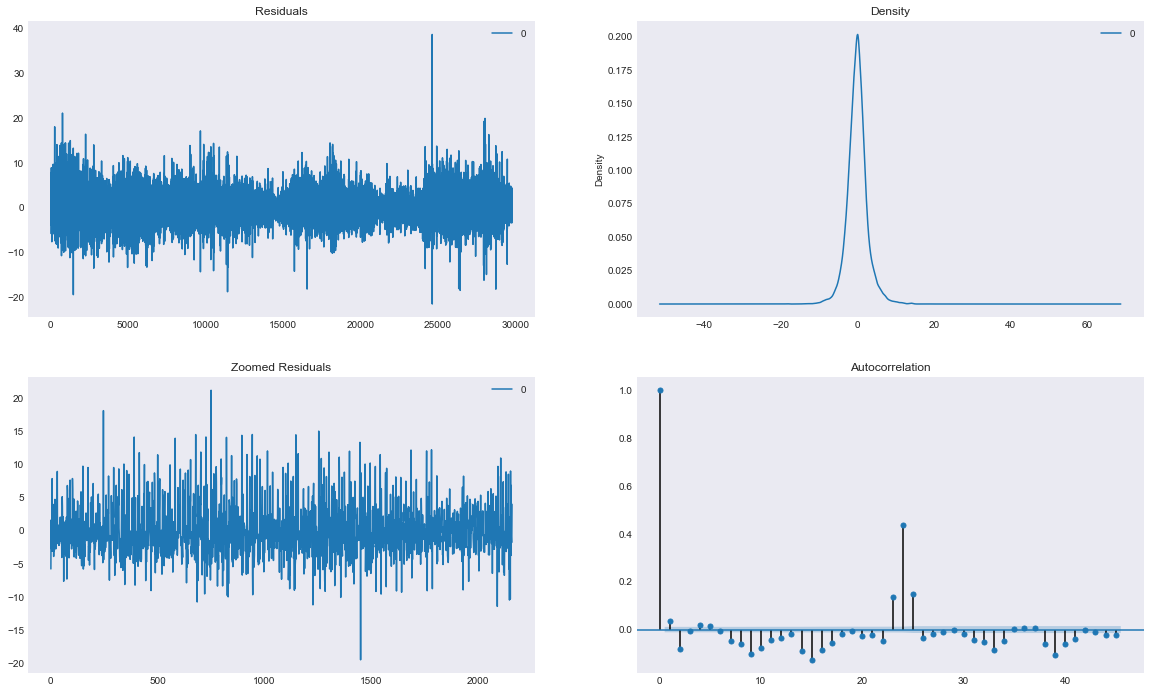

In [73]:
#Check residuals
from statsmodels.graphics.tsaplots import plot_acf


residuals = pd.DataFrame(model_fitted.resid)
fig, ax = plt.subplots(2,2, figsize = (20,12))
residuals.plot(title="Residuals", ax=ax[0,0])
residuals.plot(kind='kde', title='Density', ax=ax[0,1])
residuals[:24*90].plot(title="Zoomed Residuals", ax=ax[1,0])
plot_acf(residuals, ax=ax[1,1])

plt.show()

Tree MEthod(only after LSTM)

In [ ]:
conf[:,0]

### Multivariate Analysis - Vector Autoregression

#### Prepare Data

**Select order of P for VAR Model

In [ ]:
# #Read in and init VARMAX
# from statsmodels.tsa.api import VAR

# model = VAR(X_train)


# # for p in list(range(1,10)):
# #     result = model.fit(p)
# #     print('Lag Order: ', p)
# #     print('Model Stats: \nAIC:{}\nBIC:{}\nFPE:{}\nHQIC:'.format(result.aic, result.bic, 
# #                                                                 result.fpe, result.hqic))
# #     print('============================================')

In [ ]:
# model.select_order(maxlags=24).summary()

In [ ]:
# model_fitted = model.fit(24, )


# #https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
# #granger causility tes


**Check residuals**

In [ ]:
# #Import durbin_watson
# from statsmodels.stats.stattools import durbin_watson

# #Init durbin_watson and get serial correlation results
# serial_corr = durbin_watson(model_fitted.resid)

# #View results
# for col,value in zip(X_train.columns, serial_corr):
#     print(col, 'DW Statistic:', round(value,3))

**Forecast Predictions w/ VAR**

In [ ]:
# #Apply lag to X_train
# lag_order = model_fitted.k_ar
# var_input_data = X_train.values[-lag_order:]

In [ ]:
# forecast = model_fitted.forecast(var_input_data, steps = len(X_test))

In [ ]:
# #Create a dataframe of forecast values
# df_forecast = pd.DataFrame(forecast, index=X_test.index[-len(X_test):], columns=X_test.columns)

# df_forecast

**Plot Forecasts to see fit**

In [ ]:
# def invert_transformation(df_train, df_forecast, second_diff=False):
#     """Revert back the differencing to get the forecast to original scale."""
#     df_fc = df_forecast.copy()
#     columns = df_train.columns
#     for col in columns:        
#         # Roll back 2nd Diff
#         if second_diff:
#             df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
#         # Roll back 1st Diff
#         df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
#     return df_fc

In [ ]:
# predictions = pd.DataFrame()
# predictions['var_forecast'] = df_forecast['price actual']
# predictions['actual'] = X_test['price actual']
# #predictions['forecast_converted'] = predictions['var_forecast'].cumsum() + predictions['actual'].iloc[-1]
# predictions['forecast_converted'] = predictions['var_forecast'].cumsum() + predictions['actual'].iloc[-24]+ predictions['var_forecast'].iloc[-1]

# predictions.head(15)

In [ ]:
# f, ax = plt.subplots(figsize = (20,10))

# predictions['forecast_converted'][:24*90].plot(ax=ax, color = 'r')
# predictions['actual'][:24*90].plot(ax=ax, color = 'b')

# model_performance(predictions['forecast_converted'].values, predictions['actual'].values)

**Evaluate Metrics**

In [ ]:
LSTM Below

In [ ]:
# #Get values as 1D arrays
# X = X_train['price actual'].values
# Y = X_test['price actual'].values

# #Normalize X and Y
# X_mean = np.mean(X)
# X_std = np.std(X)

# #Transfrom
# X = (X - X_mean)/X_std
# Y = (Y - X_mean)/X_std

In [ ]:
# #Define samples as 200 observations each from X
# samples = []
# length = 200

# #Iterate over X in groups of 200 and append to samples
# for i in range(0,len(X),length):
#     sample = X[i:i+length]
#     samples.append(sample)

# #Check
# print(len(samples))

In [ ]:
# samples = np.array(samples)
# len(samples)

In [ ]:
# lstm_model = tf.keras.models.Sequential()
# lstm_model.add(tf.keras.layers.LSTM(32, return_sequences=True, input_shape = X.shape))
# lstm_model.add(tf.keras.layers.LSTM(16, activation='relu'))
# lstm_model.add(tf.keras.layers.Dense(10))

# #Compile
# lstm_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')


In [ ]:
# multi_step_history = lstm_model.fit(X, epochs=30,
#                                           steps_per_epoch=200,
#                                           validation_data=Y,
#                                           validation_steps=50)

**Evaluate Metrics**

### Build LSTM model

**Prepare data**